### Objective

Our objective is to build an image classifier then use it to make predictions.

In [1]:
#!pip install --upgrade tensorflow
###################################################
## not yet installed, on my lists todo things.    #
#pip install tensorflow-gpu                       #
###################################################
#!pip install --upgrade matplotlib

In [2]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.2.0


## Import the Fashion MNIST dataset

In [3]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [4]:
### Check out train data
train_images.shape

(60000, 28, 28)

In [5]:
len(train_labels)

60000

In [6]:
### Check out test data

In [7]:
test_images.shape

(10000, 28, 28)

In [8]:
test_labels.shape

(10000,)

In [9]:
# Add the class names to the labels
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

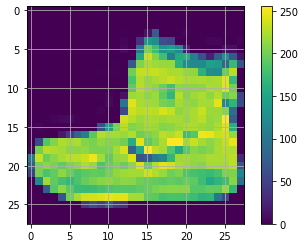

In [10]:
# Visualize the data which we are using for training.
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(True)
plt.show()

Scale these values to a range of 0 to 1 before feeding them to the neural network model. To do so, divide the values by 255. It's important that the training set and the testing set be preprocessed in the same way

In [11]:
train_images = train_images / 255.0

test_images = test_images / 255.0

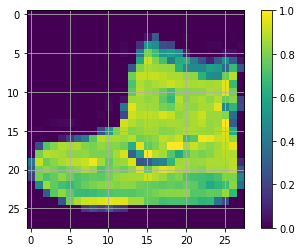

In [12]:
# Visualize the data which we are using for training, after scaling it as we see now the 1.0 takes the value of 255.
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(True)
plt.show()

#### To see if the test later works let check what is the 5th image and its label.

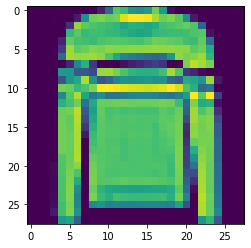

In [13]:
plt.imshow(train_images[5])

#### Label of this image

In [14]:
class_names[train_labels[5]]

'Pullover'

## To verify that the data is in the correct format and that you're ready to build and train the network, let's display the first 25 images from the training set and display the class name below each image.

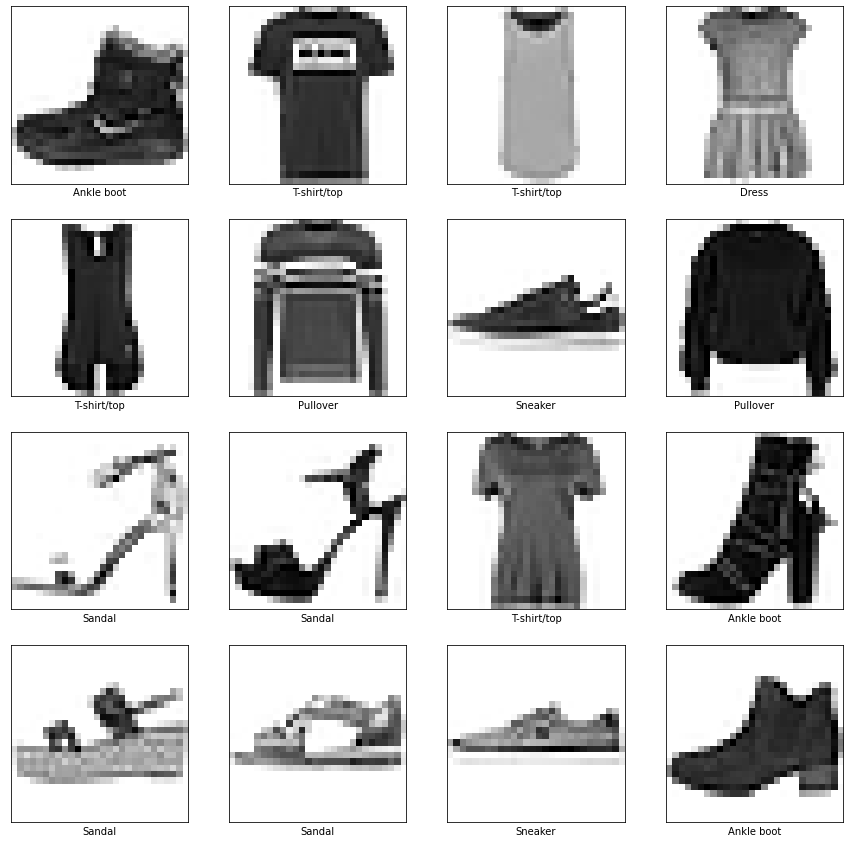

In [15]:
plt.figure(figsize=(15,15))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

##  Check a PCA and a TSNE representation of the data set

In [16]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
#import umap


In [17]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()


n_examples = 5000
data=train_images[:n_examples,:].reshape(n_examples,-1)
data=data/255

labels=train_labels[:n_examples]

In [18]:
tsne_model = TSNE(perplexity=30, n_components=2, learning_rate=200, early_exaggeration=4.0,init='pca', 
                      n_iter=2000, random_state=2233212, metric='euclidean', verbose=100 )

tsne_model = TSNE(perplexity=50, n_components=2, learning_rate=200, early_exaggeration=4.0,init='pca', 
                  n_iter=300, random_state=2233212, metric='euclidean', verbose=100 )

tsne_fmnist = tsne_model.fit_transform(data)
#plt.scatter(tsne_fmnist[:,0],tsne_fmnist[:,1],c=labels,s=10)

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 5000 samples in 0.268s...
[t-SNE] Computed neighbors for 5000 samples in 26.434s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5000
[t-SNE] Computed conditional probabilities for sample 2000 / 5000
[t-SNE] Computed conditional probabilities for sample 3000 / 5000
[t-SNE] Computed conditional probabilities for sample 4000 / 5000
[t-SNE] Computed conditional probabilities for sample 5000 / 5000
[t-SNE] Mean sigma: 2.071947
[t-SNE] Computed conditional probabilities in 0.197s
[t-SNE] Iteration 50: error = 15.0193872, gradient norm = 0.0023564 (50 iterations in 234.494s)
[t-SNE] Iteration 100: error = 15.2163258, gradient norm = 0.0002592 (50 iterations in 235.819s)
[t-SNE] Iteration 150: error = 15.2406607, gradient norm = 0.0001710 (50 iterations in 235.039s)
[t-SNE] Iteration 200: error = 15.2468004, gradient norm = 0.0001307 (50 iterations in 235.348s)
[t-SNE] Iteration 250: error = 15.2497377, gradient norm =

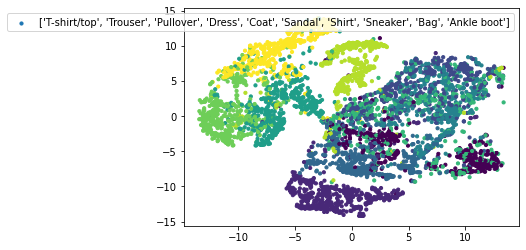

In [19]:
#fig, ax = plt.subplots(1,1)
plt.scatter(tsne_fmnist[:,0],tsne_fmnist[:,1],c=labels,s=10,label=class_names)
plt.legend()
plt.show()

## Now start building the model. 
### Building the neural network requires configuring the layers of the model, then compiling the model.
#### set_up_the_layers

The basic building block of a neural network is the layer. Layers extract representations from the data fed into them. Hopefully, these representations are meaningful for the problem at hand.

Most of deep learning consists of chaining together simple layers. Most layers, such as **tf.keras.layers.Dense**, have parameters that are learned during training.



In [20]:
model = keras.Sequential([
        #This layer has no parameters to learn; it only reformats the data.
    keras.layers.Flatten(input_shape = (28,28)),
        #These are densely connected, or fully connected, neural layers. The first Dense layer has 128 nodes (or neurons),second 256,128,64 and 10.
        #Each node contains a score that indicates the current image belongs to one of the 10 classes. .
    keras.layers.Dense(128,activation="relu"), # either use softmax as another option.
    keras.layers.Dense(256,activation="relu"),
   # keras.layers.Dense(128,activation="relu"),
    keras.layers.Dense(64,activation="relu"),
    keras.layers.Dense(10)
])


## Compile the model
#### Before the model is ready for training, it needs a few more settings. These are added during the model's compile step:

    + Loss function —This measures how accurate the model is during training. You want to minimize this function to "steer" the model in the right direction.  
    + Optimizer —This is how the model is updated based on the data it sees and its loss function.  
    + Metrics —Used to monitor the training and testing steps. The following example uses accuracy, the fraction of the images that are correctly classified.

In [21]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

## Train the model
#### Training the neural network model requires the following steps:

Feed the training data to the model. In this example, the training data is in the **train_images** and **train_labels** arrays.  
The model learns to associate images and labels.  
You ask the model to make predictions about a test set—in this example, the **test_images** array.  
Verify that the predictions match the labels from the **test_labels** array.  

## Feed the model
To start training, call the **model.fit** method—so called because it "fits" the model to the training data:

In [22]:
save_path='save/mnist_{epoch}.ckpt'
save_callback = tf.keras.callbacks.ModelCheckpoint(filepath=save_path,save_weights_only=True)


hist = model.fit(x = train_images, y = train_labels,
                 epochs = 128, batch_size = 128,
                 validation_data=(test_images, test_labels),
                 callbacks=[save_callback])


Epoch 1/128
469/469 [==============================] - 1s 3ms/step - loss: 1.9042 - accuracy: 0.7549 - val_loss: 0.6746 - val_accuracy: 0.7991
Epoch 2/128
469/469 [==============================] - 1s 2ms/step - loss: 0.5414 - accuracy: 0.8212 - val_loss: 0.6104 - val_accuracy: 0.8037
Epoch 3/128
469/469 [==============================] - 1s 2ms/step - loss: 0.4466 - accuracy: 0.8445 - val_loss: 0.4832 - val_accuracy: 0.8374
Epoch 4/128
469/469 [==============================] - 1s 2ms/step - loss: 0.4098 - accuracy: 0.8545 - val_loss: 0.4547 - val_accuracy: 0.8433
Epoch 5/128
469/469 [==============================] - 1s 2ms/step - loss: 0.3871 - accuracy: 0.8610 - val_loss: 0.4914 - val_accuracy: 0.8321
Epoch 6/128
469/469 [==============================] - 1s 2ms/step - loss: 0.3593 - accuracy: 0.8698 - val_loss: 0.4332 - val_accuracy: 0.8454
Epoch 7/128
469/469 [==============================] - 1s 2ms/step - loss: 0.3567 - accuracy: 0.8705 - val_loss: 0.4642 - val_accuracy: 0.8476

Epoch 58/128
469/469 [==============================] - 1s 2ms/step - loss: 0.1536 - accuracy: 0.9432 - val_loss: 0.4942 - val_accuracy: 0.8782
Epoch 59/128
469/469 [==============================] - 1s 2ms/step - loss: 0.1441 - accuracy: 0.9458 - val_loss: 0.5119 - val_accuracy: 0.8838
Epoch 60/128
469/469 [==============================] - 1s 2ms/step - loss: 0.1502 - accuracy: 0.9449 - val_loss: 0.4837 - val_accuracy: 0.8804
Epoch 61/128
469/469 [==============================] - 1s 2ms/step - loss: 0.1428 - accuracy: 0.9475 - val_loss: 0.5214 - val_accuracy: 0.8820
Epoch 62/128
469/469 [==============================] - 1s 2ms/step - loss: 0.1474 - accuracy: 0.9459 - val_loss: 0.5003 - val_accuracy: 0.8849
Epoch 63/128
469/469 [==============================] - 1s 2ms/step - loss: 0.1500 - accuracy: 0.9447 - val_loss: 0.5365 - val_accuracy: 0.8775
Epoch 64/128
469/469 [==============================] - 1s 2ms/step - loss: 0.1453 - accuracy: 0.9476 - val_loss: 0.5065 - val_accuracy:

Epoch 115/128
469/469 [==============================] - 1s 2ms/step - loss: 0.0989 - accuracy: 0.9655 - val_loss: 0.7932 - val_accuracy: 0.8806
Epoch 116/128
469/469 [==============================] - 1s 2ms/step - loss: 0.1015 - accuracy: 0.9638 - val_loss: 0.8058 - val_accuracy: 0.8818
Epoch 117/128
469/469 [==============================] - 1s 2ms/step - loss: 0.0976 - accuracy: 0.9656 - val_loss: 0.8219 - val_accuracy: 0.8812
Epoch 118/128
469/469 [==============================] - 1s 2ms/step - loss: 0.0925 - accuracy: 0.9662 - val_loss: 0.7268 - val_accuracy: 0.8801
Epoch 119/128
469/469 [==============================] - 1s 2ms/step - loss: 0.1228 - accuracy: 0.9579 - val_loss: 0.7782 - val_accuracy: 0.8877
Epoch 120/128
469/469 [==============================] - 1s 2ms/step - loss: 0.0922 - accuracy: 0.9679 - val_loss: 0.7850 - val_accuracy: 0.8795
Epoch 121/128
469/469 [==============================] - 1s 2ms/step - loss: 0.1053 - accuracy: 0.9634 - val_loss: 0.8014 - val_ac

In [23]:
### Get the date from the history and the checkpoints from the model fitting for plotting the fitting and respresent it.

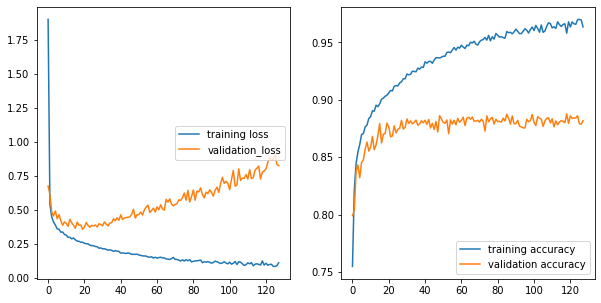

In [24]:
fig, axs = plt.subplots(1, 2, figsize=(10,5))
axs[0].plot(hist.epoch, hist.history['loss'])
axs[0].plot(hist.epoch, hist.history['val_loss'])

axs[0].legend(('training loss', 'validation_loss'), loc='center right')

axs[1].plot(hist.epoch, hist.history['accuracy'])
axs[1].plot(hist.epoch,hist.history['val_accuracy'])

axs[1].legend(('training accuracy', 'validation accuracy'), loc='lower right')

plt.show()

## Check the results
##### Evaluate accuracy, exploring how the model performs.

In [25]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.8249 - accuracy: 0.8818

Test accuracy: 0.8817999958992004


#### Make predictions
 The model's linear outputs, logits. Attach a softmax layer to convert the logits to probabilities, which are easier to interpret.

In [26]:
prob_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [27]:
predictions = prob_model.predict(test_images)


In [28]:
predictions[22]

array([0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       2.2746456e-35, 2.6754191e-11, 0.0000000e+00, 9.9999988e-01,
       1.6735845e-32, 7.0930106e-08], dtype=float32)

Take the highest value which will show which one is the prdicted label for the selected test image.



In [29]:
np.argmax(predictions[22])

7

Now check the test_label to see if our classifier learned and is able to discrime the images.

In [30]:
class_names[7]

'Sneaker'

In [31]:
test_labels[22]

7

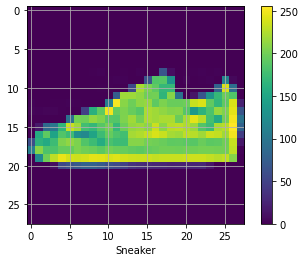

In [32]:
# Visualize the label and the real vs predicted.
plt.figure()
plt.imshow(test_images[22])
plt.colorbar()
plt.grid(True)
plt.xlabel(class_names[test_labels[22]])
plt.show()

Text(0.5, 0, 'This is the test_image [13], which should represent it real label [Dress] and which predicted label from our model is [Dress]')

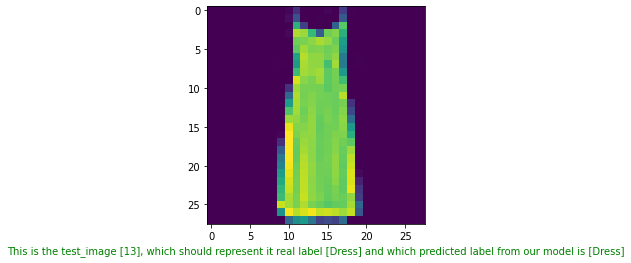

In [33]:
#Prdicted value from the model.
im_id = 13
#Check what is the real label of the sample
real_label = class_names[test_labels[im_id]]

#Get the predictd label from the model
predicted_label = class_names[np.argmax(predictions[im_id])]

#Paint in green both if they match otherwise red
if predicted_label == real_label:
    color = "green"
else:
    color = "red"
plt.imshow(test_images[im_id])
plt.xlabel("This is the test_image [{}], which should represent it real label [{}] and which predicted label from our model is [{}]".format(im_id,real_label,predicted_label),color = color)
#print("Its real label is: ",test_labels[im_id],"\nThis label means: ",class_names[test_labels[im_id]],"\nAnd the prdicted result from our model is: ",predicted_label)



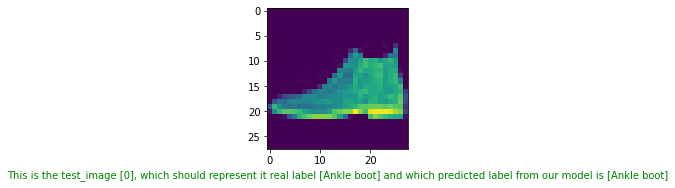

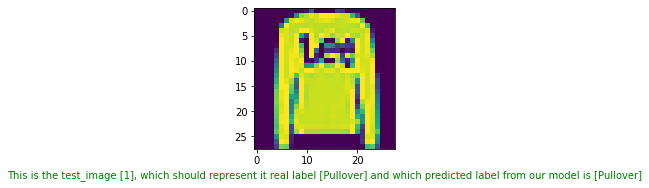

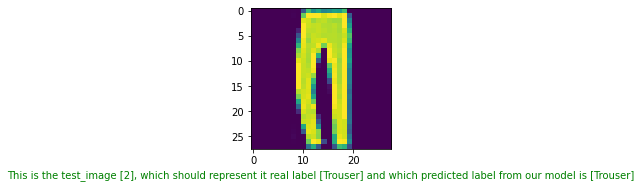

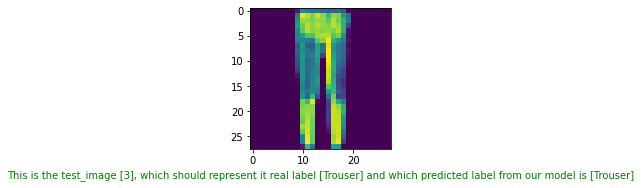

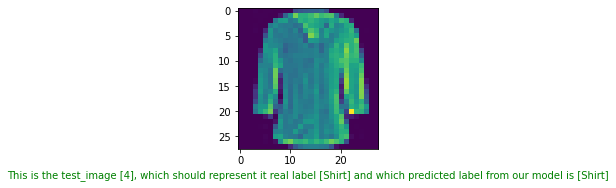

In [34]:
num_rows = 5
num_cols = 1
num_images = num_rows*num_cols
for i in range(num_images):
    plt.figure(figsize=(15,15))
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    #Check what is the real label of the sample
    real_label = class_names[test_labels[i]]

    #Get the predictd label from the model
    predicted_label = class_names[np.argmax(predictions[i])]

    #Paint in green both if they match otherwise red
    if predicted_label == real_label:
        color = "green"
    else:
        color = "red"
    plt.imshow(test_images[i])
    plt.xlabel("This is the test_image [{}], which should represent it real label [{}] and which predicted label from our model is [{}]".format(i,real_label,predicted_label),color = color)
    #print("Its real label is: ",test_labels[im_id],"\nThis label means: ",class_names[test_labels[im_id]],"\nAnd the prdicted result from our model is: ",predicted_label)
    i=i+1
    
  


### Finally use the trained model 

Use any test image and see if the prediction fits the labels and they make a logical sense.
###### Using a test image from the fashion mnist (again)

In [35]:
img_test = test_images[22]
label_img_test = test_labels[22]
print("The shape of the image is: ",img_test.shape," and the label of the image is ",label_img_test,
      "\nwhich means if select the [names]:",class_names[label_img_test]
     )

The shape of the image is:  (28, 28)  and the label of the image is  7 
which means if select the [names]: Sneaker


In [36]:
#### Create a new list to add the image we are going to test
img_test_list = (np.expand_dims(img_test,0))
# Let s check the image is alone in the list and effectively the size still 28x28
print(img_test_list.shape)


(1, 28, 28)


In [37]:
## Predict the correct label of this image.
prediction_single_image = prob_model.predict(img_test_list)
print(class_names[np.argmax(prediction_single_image)])

Sneaker


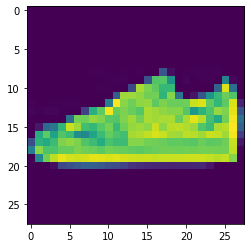

In [38]:
## Check this image test corrsponds really to a sneaker.
plt.imshow(img_test)

###### Using a test image from my choice

In [39]:
#!pip install scikit-image

In [40]:
from skimage import io
import os,sys,glob

In [41]:
dir = '/home/marius/Environments/cas_m3notebooks/notebooks/my_img_test/'
#ir2 = "wsl$\Ubuntu-20.04\home\marius\Environments\cas_m3notebooks\notebooks\my_img_test"
allfiles = os.listdir(dir)
files = [ fname for fname in allfiles if fname.endswith('_resized.png') ]

In [42]:
my_images = [os.path.join(dir,img) for img in files ]
my_images

['/home/marius/Environments/cas_m3notebooks/notebooks/my_img_test/merrelltest_resized.png',
 '/home/marius/Environments/cas_m3notebooks/notebooks/my_img_test/tshirttest_resized.png',
 '/home/marius/Environments/cas_m3notebooks/notebooks/my_img_test/vivotest_resized.png']

In [43]:
my_images_list = [io.imread(m,as_gray=True) for m in my_images ]

In [44]:
#my_images_list = [ (np.expand_dims(my_images_list[i],i)) for i in range(0,len(my_images_list)) ]


## my image 1

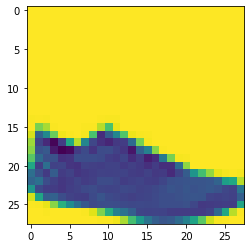

In [45]:
plt.imshow(my_images_list[0])
my_image_list_0 = (np.expand_dims(my_images_list[0],0))

In [46]:
my_image_list_0.shape

(1, 28, 28)

In [47]:
prediction_my_image = prob_model.predict(my_image_list_0)
print(class_names[np.argmax(prediction_my_image)])

Shirt


## my image 2

(1, 28, 28)

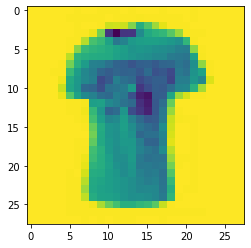

In [48]:
plt.imshow(my_images_list[1])
my_image_list_1 = (np.expand_dims(my_images_list[1],0))
my_image_list_1.shape

In [49]:
prediction_my_image = prob_model.predict(my_image_list_1)
print(class_names[np.argmax(prediction_my_image)])

Shirt


## my last test image

(1, 28, 28)

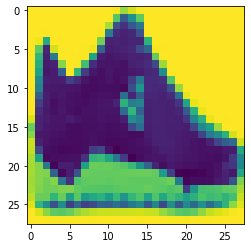

In [50]:
plt.imshow(my_images_list[2])
my_image_list_2 = (np.expand_dims(my_images_list[2],0))
my_image_list_2.shape

In [51]:
prediction_my_image = prob_model.predict(my_image_list_2)
print(class_names[np.argmax(prediction_my_image)])

Dress


In [52]:
print("GPU is", "available" if tf.config.experimental.list_physical_devices("GPU") else "NOT AVAILABLE")

GPU is NOT AVAILABLE
